In [4]:
#导入数据
from sklearn import datasets
iris_dataset = datasets.load_iris()
X = iris_dataset.data[:,[0,1]]
y = iris_dataset.target

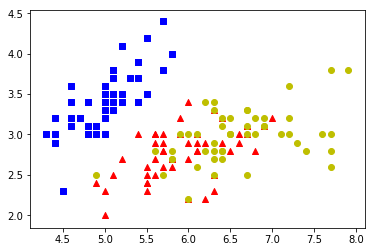

In [14]:
#数据可视化
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.figure()
for label,color,marker in zip(set(y),'bry',['s','^','o']):
    index = np.where(y == label)
    plt.scatter(X[index,0],X[index,1],color = color,marker = marker)
plt.show()

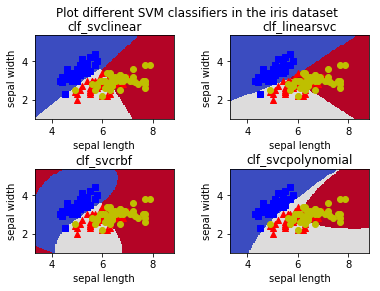

In [40]:
from sklearn.svm import SVC,LinearSVC
clf_svclinear = SVC(kernel = 'linear')
clf_linearsvc = LinearSVC()
clf_svcrbf = SVC(kernel = 'rbf',gamma=0.7)
clf_svcpolynomial = SVC(kernel = 'poly')
title_list = ['clf_svclinear','clf_linearsvc','clf_svcrbf','clf_svcpolynomial']
for i,clf in enumerate((clf_svclinear,clf_linearsvc,clf_svcrbf,clf_svcpolynomial)):
    clf.fit(X,y)
    mesh_step = 0.05
    X1_min,X1_max = X[:,0].min()-1,X[:,0].max()+1
    X2_min,X2_max = X[:,1].min()-1,X[:,1].max()+1
    xx,yy = np.meshgrid(np.arange(X1_min,X1_max,mesh_step),np.arange(X2_min,X2_max,mesh_step))
    Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.subplot(2,2,i+1)
    plt.subplots_adjust(wspace=0.4, hspace=0.6)
    plt.xlabel('sepal length')
    plt.ylabel('sepal width')
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())
    plt.pcolormesh(xx,yy,Z,cmap = plt.cm.coolwarm)
#     plt.contourf(xx,yy,Z,cmap = plt.cm.Paired)
    plt.axis('tight')
    for label,color,marker in zip(set(y),'bry',['s','^','o']):
        index = np.where(y == label)
        plt.scatter(X[index,0],X[index,1],color = color,marker = marker)
    plt.title(title_list[i])
    plt.suptitle('Plot different SVM classifiers in the iris dataset')
plt.show()